# HW3

##### PHYS434 - Advanced Laboratory: Computational Data Analysis
##### Professor: Miguel Morales
<br>

##### Due date: 10/21/2021
##### By Erik Solhaug
<br>

In [1]:
# Importing needed libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats, signal

# This sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
# This sets the fontsize of the x- and y-labels
fsize = 30

## Problem 1

## A)

The first algorithm makes $ 3 + 5 = 8 $ mistakes while the second algorithm makes $ 1 + 11 = 12 $ mistakes, so the first algorithm makes the least mistakes.

## B)

Since locking a person in for 30 extra seconds is not a big deal, then the algorithm that miscategorizes the least birds (as people and not birds) and thus sets less birds free, is the better algorithm for the zoo.

This would be the second algorithm since it miscategorizes only $ \frac{1}{47+1} = \frac{1}{48} $ birds as people while the first miscategorizes $ \frac{3}{45+3} = \frac{3}{48} $ birds as people.

## C)

Instead of imagining there now being 99 birds and 1 person in the aviary (instead of the previous 48 and 52), we will expand our sample size in order to create a truth table consistent with there being 99% birds and 1% people.

This yields the truth tables:

In [2]:
birdfact = 99/48
aa, ba = 45*birdfact, 3*birdfact
aa, ba

(92.8125, 6.1875)

In [3]:
personfact = 1/52
ab, bb = 5*personfact, 47*personfact
ab, bb

(0.09615384615384616, 0.9038461538461539)

In [4]:
# If I have done this correctly the truth table values should add up to 100 (my total sample size):
aa + ba + ab + bb

100.0

|  | **True Bird** | **True Person** |
| --- | --- | --- |
| NN Bird | 92.8125 | 0.09615384615384616 |
| NN Person | 6.1875 | 0.9038461538461539 |
| Total | 99 | 1 |

We repeat the process for the second algorithm:

In [5]:
aa, ba = 47*birdfact, 1*birdfact
aa, ba

(96.9375, 2.0625)

In [6]:
ab, bb = 10*personfact, 42*personfact
ab, bb

(0.19230769230769232, 0.8076923076923077)

In [7]:
# If I have done this correctly the truth table values should add up to 100 (my total sample size):
aa + ba + ab + bb

100.0

|  | **True Bird** | **True Person** |
| --- | --- | --- |
| NN Bird | 96.9375 | 0.19230769230769232 |
| NN Person | 2.0625 | 0.8076923076923077 |
| Total | 99 | 1 |

## Problem 2

### Example #1

We find that the sum of Gaussian X and Gaussian Y is a Gaussian X+Y with:
$$ \mu_{X+Y} = \mu_X + \mu_Y $$
and
$$ \sigma_{X+Y}^2 = \sigma_X^2 + \sigma_Y^2 $$

### Example #2

Rayleigh, Gamma and Exponential distributions are related and complete a 'circle' of transformations.

## A)

Since an exponential distribution is given by:

$$ \lambda e^{-\lambda x} $$

If we add two equal exponential distributions together, it is a linear combination of the above expression. Specifically, we are adding **two** distributions together, so the new distribution becomes:

$$ 2 \lambda e^{-\lambda x} $$

We look this up in one of the diagrams from lecture and find that the Exponential Distribution $ X_i $ and the Erlang Distribution are related to each other by $ X_1 + ... X_n $. Since we produce a linear combination of exponential functions, we know that two equal exponential distributions summed together becomes an **Erlang Distribution**.

## B)

In this case, we are dividing a standard normal distribution (Gaussian with $ \mu = 0, \sigma = 1$) by another standard normal distribution - these are identical.

We look up this up in one of the diagrams from the lecture and find that a Standard Normal Distribution $X_i$ is related to a Standard Cauchy Distribution by $ \frac{X_1}{X_2} $. Thus, this is a **Standard Cauchy Distribution**.

## C)

Now, for a 2D Gaussian with vectors $ X\vec{i} + Y\vec{j}$.If I measure the amplitude of this vector, what is its pdf?

The amplitude of this vector is:
$$ \sqrt{X^2 + Y^2} = \sqrt{X_1^2 + X_2^2}$$

And from Wikipedia (https://en.wikipedia.org/wiki/Rayleigh_distribution), we see that this amplitude relates the 2D Gaussian to the **Rayleigh distribution**. A Rayleigh with standard deviation $ \sigma $ will be related to a normal distribution with mean $ \mu = 0 $ and standard deviation $ \sigma^2 $. 

Thus, the Gaussian and Rayleigh distributions below will be related in that if you square two Gaussian distributions with zero mean, add them and take the square root of this sum (essentially take the norm and find the radial vector of the 2D Gaussian), one would get a Rayleigh distribution - which in terms tells us something about the distribution across the two dimensional Gaussian per radius integrated over an angle from 0 to 2pi around the center of the 2D Gaussian distribution.

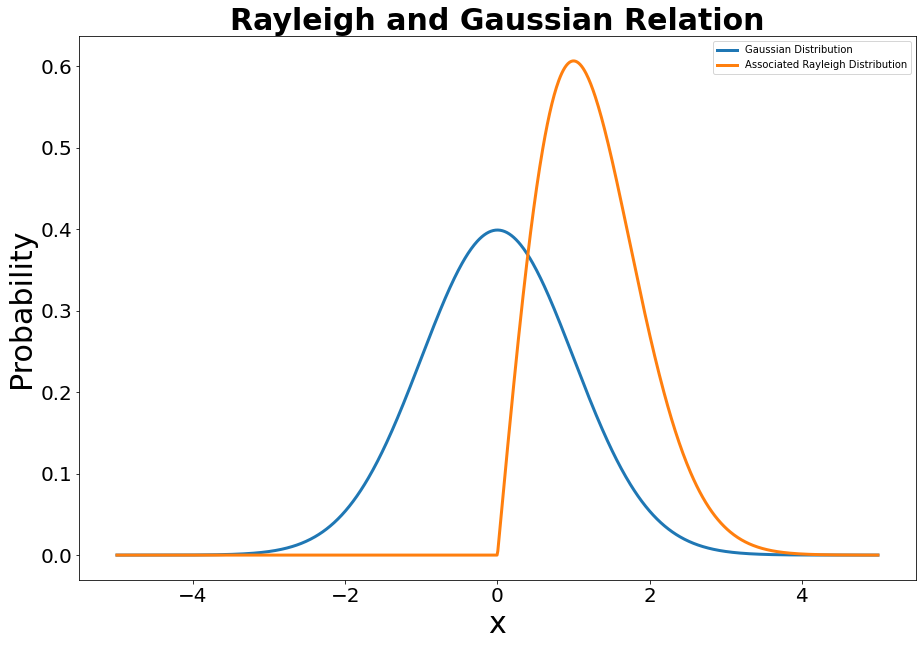

In [8]:
sigma = 1
mu = 0

rayleigh = stats.rayleigh(loc = mu, scale = np.sqrt(sigma))
gaussian = stats.norm(loc = mu, scale = sigma)

x = np.linspace(-5, 5, 1000)
gaussian_pdf = gaussian.pdf(x)

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.plot(x, gaussian_pdf, label = 'Gaussian Distribution', linewidth = 3)
ax.plot(x, rayleigh.pdf(x), label = 'Associated Rayleigh Distribution', linewidth = 3)
ax.set_xlabel('x', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
ax.set_title('Rayleigh and Gaussian Relation', fontsize = fsize, fontweight = 'bold')
# ax.set_yscale('log')
ax.legend()
plt.show()